<a href="https://colab.research.google.com/github/johnsureshp/deep-learning-projedts/blob/main/CIFAR10_DATASET_DL_PRJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_test.shape

(10000, 1)

In [6]:
y_train.shape

(50000, 1)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
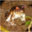

In [7]:
x_train[0]

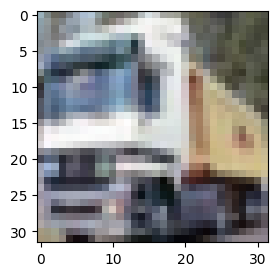

In [8]:

plt.figure(figsize=(3,3))
plt.imshow(x_train[1])

In [9]:
classes = ['aeroplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [11]:
def plt_show(x,y,index):
    plt.figure(figsize=(3,3))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
    plt.show()

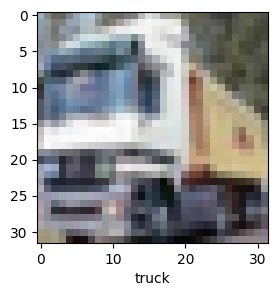

In [12]:
plt_show(x_train,y_train,1)

In [13]:
x_train = x_train/255
x_test = x_test/255

In [14]:
model =keras.Sequential([
    keras.layers.Conv2D(filters =32 , kernel_size =(3,3),input_shape =(32,32,3),activation ='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 64,kernel_size =(3,3),activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 128,kernel_size =(3,3),activation = 'relu'),

    keras.layers.MaxPooling2D((2,2)),
    #ann
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation ='relu'),
    keras.layers.Dense(64,activation ='relu'),
    keras.layers.Dense(10,activation ='softmax')
    ])

In [15]:
model.compile(optimizer ='adam',loss ='sparse_categorical_crossentropy',metrics =['accuracy'])
model.fit(x_train,y_train,epochs =10)

Epoch 1/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.5363 - accuracy: 0.4365
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1526 - accuracy: 0.5895
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9834 - accuracy: 0.6527
Epoch 4/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.8801 - accuracy: 0.6909
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7937 - accuracy: 0.7206
Epoch 6/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7285 - accuracy: 0.7446
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6678 - accuracy: 0.7663
Epoch 8/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6155 - accuracy: 0.7845
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.5746 - accuracy: 0.7964
Epoch 10/10
1563/1563 [==============================] - 62s 40m

In [16]:
y_pred = model.predict(x_test)

313/313 [==============================] - 4s 12ms/step


In [17]:
y_pred[0]


array([1.6714535e-03, 3.7153045e-04, 1.5551967e-03, 9.2587459e-01,
       1.2257402e-03, 5.6238782e-02, 4.4210004e-03, 8.9963985e-04,
       7.4764430e-03, 2.6555060e-04], dtype=float32)

In [18]:
my_pred =[np.argmax(i) for i in y_pred]
my_pred[:5]

[3, 8, 8, 0, 6]

In [19]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)